In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [27]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [28]:
y = train['target']
X = train.drop('target', axis=1)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_train)

In [33]:
conf_mx = confusion_matrix(y_train, y_train)
conf_mx

array([[ 6828,     0,     0,     0],
       [    0, 45950,     0,     0],
       [    0,     0, 17104,     0],
       [    0,     0,     0, 10118]])

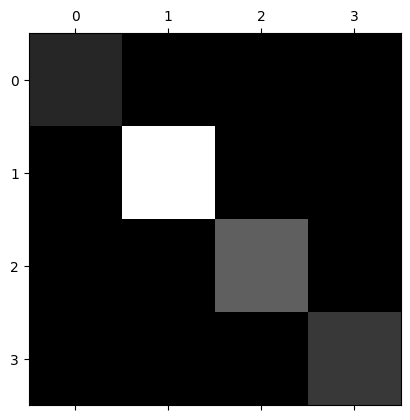

In [36]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [34]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

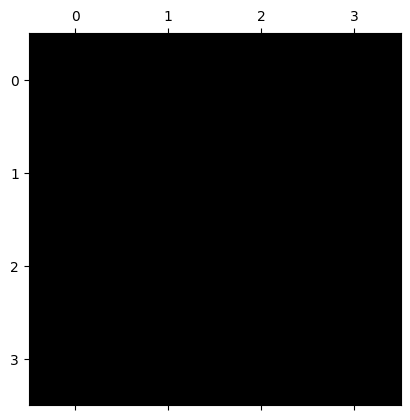

In [35]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [39]:
probs_test = model.predict_proba(test)
probs_test

array([[0.12, 0.56, 0.2 , 0.12],
       [0.12, 0.55, 0.16, 0.17],
       [0.08, 0.31, 0.38, 0.23],
       ...,
       [0.14, 0.53, 0.15, 0.18],
       [0.1 , 0.52, 0.21, 0.17],
       [0.07, 0.44, 0.21, 0.28]], shape=(50000, 4))

In [41]:
df = pd.DataFrame({
    'id': test['id'].values,  # Or use np.arange(100000, 100000 + len(submission_preds)) if needed
    'Class_1': probs_test[:, 0],
    'Class_2': probs_test[:, 1],
    'Class_3': probs_test[:, 2],
    'Class_4': probs_test[:, 3],
})

df.to_csv('../submission/submission.csv', index=False)
